In [1]:
import pandas as pd

from settings import key
from datetime import datetime


In [2]:
coords = []

with open("server.log", "r") as f:
    while line := f.readline():
        if '/api/v1/forecast/cities?lat=' in line:
            coords.append([
                str(float(line.split("=")[1].split("&")[0])), # lat
                str(float(line.split("=")[2].split("&")[0].split(" ")[0])), # lon
                datetime.strptime(line.split(",")[0][1:], '%Y-%m-%d %H:%M:%S'), # time
            ])


In [3]:
df = pd.DataFrame(coords)


In [4]:
df

,0,1,2
0,56.99167,24.30306,2024-10-30 21:22:50
1,56.99167,24.30306,2024-10-30 21:22:53
2,56.99167,24.30306,2024-10-30 21:22:54
3,56.99167,24.30306,2024-10-30 21:22:55
4,56.99167,24.30306,2024-10-30 21:22:55
...,...,...,...
30914,56.9549560546875,24.18711280822754,2024-11-20 09:45:43
30915,56.9549560546875,24.18711280822754,2024-11-20 09:45:43
30916,56.9549560546875,24.18711280822754,2024-11-20 09:45:43
30917,56.9549560546875,24.18711280822754,2024-11-20 09:45:43


In [5]:
df.columns

RangeIndex(start=0, stop=3, step=1)

In [6]:
df["date_h"] = df[2].apply(lambda r: r.strftime("%Y-%m-%d %H"))

In [7]:
df

,0,1,2,date_h
0,56.99167,24.30306,2024-10-30 21:22:50,2024-10-30 21
1,56.99167,24.30306,2024-10-30 21:22:53,2024-10-30 21
2,56.99167,24.30306,2024-10-30 21:22:54,2024-10-30 21
3,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
4,56.99167,24.30306,2024-10-30 21:22:55,2024-10-30 21
...,...,...,...,...
30914,56.9549560546875,24.18711280822754,2024-11-20 09:45:43,2024-11-20 09
30915,56.9549560546875,24.18711280822754,2024-11-20 09:45:43,2024-11-20 09
30916,56.9549560546875,24.18711280822754,2024-11-20 09:45:43,2024-11-20 09
30917,56.9549560546875,24.18711280822754,2024-11-20 09:45:43,2024-11-20 09


In [8]:
df_h = pd.DataFrame(df.groupby("date_h").count()[1]/3)

<Axes: xlabel='date_h'>

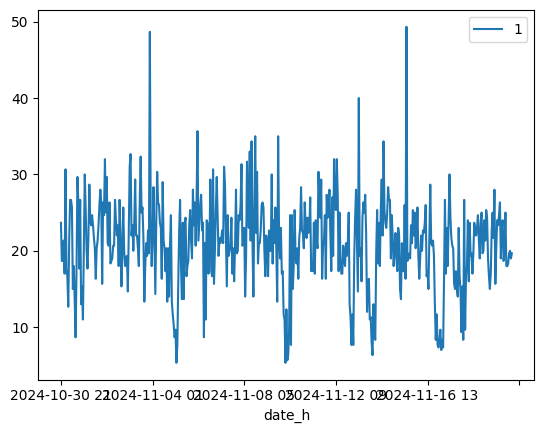

In [9]:
df_h.plot()

In [10]:
from sklearn import linear_model


In [11]:
reg = linear_model.LinearRegression()


In [12]:
import numpy as np


In [13]:
df_h_vals = df_h[1].values.reshape(-1, 1)
df_h_ct = np.array(range(len(df_h_vals))).reshape(-1, 1)


In [14]:
reg.fit(df_h_ct, df_h_vals)


LinearRegression()

In [15]:
import matplotlib.pyplot as plt


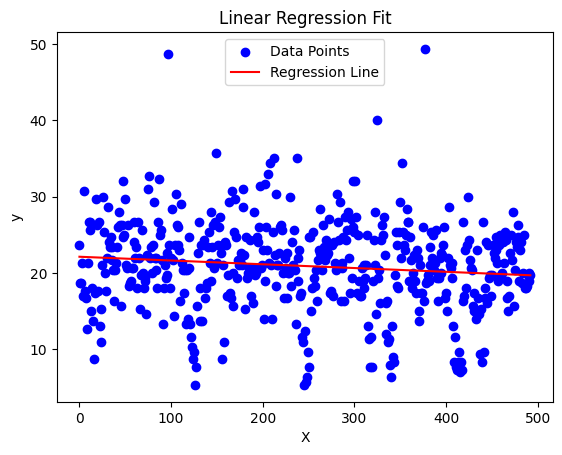

In [16]:
y_pred = reg.predict(df_h_ct)
plt.scatter(df_h_ct, df_h_vals, color='blue', label='Data Points')
plt.plot(df_h_ct, y_pred, color='red', label='Regression Line')

plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.title("Linear Regression Fit")

plt.show()

In [17]:
y_pred

array([[22.11863525],
       [22.11370316],
       [22.10877108],
       [22.10383899],
       [22.0989069 ],
       [22.09397481],
       [22.08904272],
       [22.08411063],
       [22.07917854],
       [22.07424645],
       [22.06931437],
       [22.06438228],
       [22.05945019],
       [22.0545181 ],
       [22.04958601],
       [22.04465392],
       [22.03972183],
       [22.03478975],
       [22.02985766],
       [22.02492557],
       [22.01999348],
       [22.01506139],
       [22.0101293 ],
       [22.00519721],
       [22.00026513],
       [21.99533304],
       [21.99040095],
       [21.98546886],
       [21.98053677],
       [21.97560468],
       [21.97067259],
       [21.9657405 ],
       [21.96080842],
       [21.95587633],
       [21.95094424],
       [21.94601215],
       [21.94108006],
       [21.93614797],
       [21.93121588],
       [21.9262838 ],
       [21.92135171],
       [21.91641962],
       [21.91148753],
       [21.90655544],
       [21.90162335],
       [21